This is a dataset related about the properties characteristics inserted into São Paulo. We have the the propertie area, how many badrooms and garages, the location and type such as the rental prince and variable coast. 

Let's dive in this EDA and answer some questions to discover some cools informations about the São Paulo housepricing, a huge metropolis in Brazil.

The principal questions are:

- What is the mean rental prices according to the especifics neighborhood.
- What is/are the principal(s) indicator(s) of price increase.

Anothers questions can be raised through the process.

Let's start!


In [1]:
# Importing the necessarys libs
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
plt.style.use('ggplot')

In [2]:
# File path
for dirname, _, filesname in os.walk('/kaggle/input'):
    for filename in filesname:
        print(os.path.join(dirname, filename))

/kaggle/input/sao-paulo-housing-prices/data.csv


In [3]:
# Dataframe first view
df = pd.read_csv('/kaggle/input/sao-paulo-housing-prices/data.csv')
df.head()

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654


# 1. Dataframe analysis:
- DataFrame shape/informations
- Check null values
- Split 'object'/'int' columns

In [4]:
print(f'Lines = {df.shape[0]} | Columns = {df.shape[1]}')

Lines = 11657 | Columns = 8


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11657 entries, 0 to 11656
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   address   11657 non-null  object
 1   district  11657 non-null  object
 2   area      11657 non-null  int64 
 3   bedrooms  11657 non-null  int64 
 4   garage    11657 non-null  int64 
 5   type      11657 non-null  object
 6   rent      11657 non-null  int64 
 7   total     11657 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 728.7+ KB


In [6]:
# Checking null values
df.isnull().sum()

address     0
district    0
area        0
bedrooms    0
garage      0
type        0
rent        0
total       0
dtype: int64

In [7]:
# Split columns by dtype
num_col = df.select_dtypes(include='number')
obj_col = df.select_dtypes(exclude='number')
print(f'Numeric columns: {num_col.shape[1]} | Object columns: {obj_col.shape[1]}')

Numeric columns: 5 | Object columns: 3


# 2. Price analysis

2.1 Let's analyze the 'rent' and 'total' columns and check if there is any anomaly. 
With the boxplot and histogram graphics we are able to view the distribution of values. 

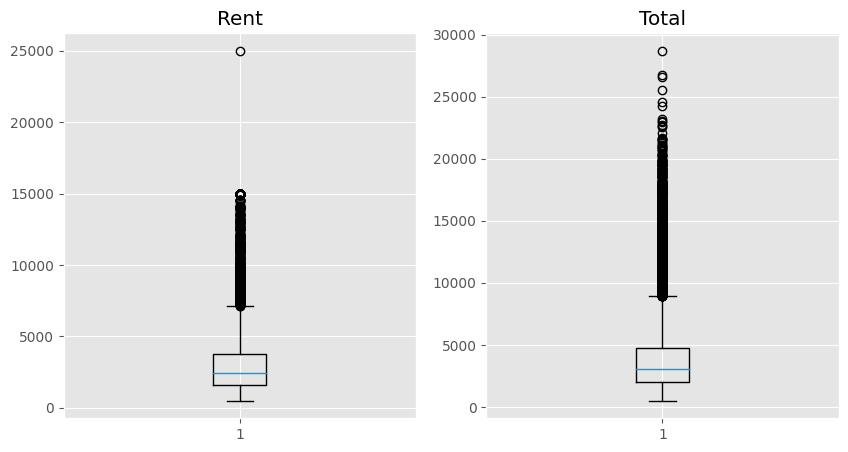

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].boxplot(df['rent'])
ax[0].set_title('Rent')

ax[1].boxplot(df['total'])
ax[1].set_title('Total')

plt.show()

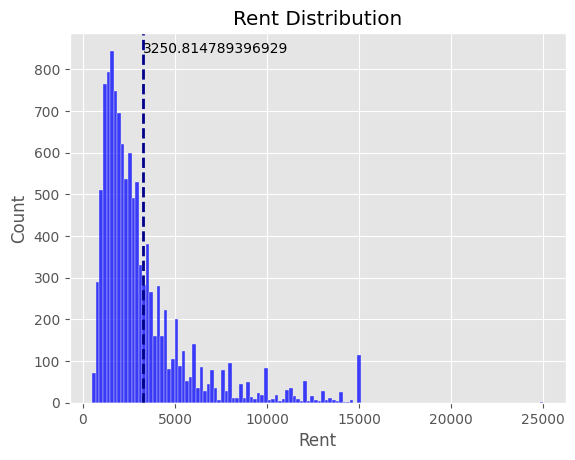

In [9]:
mean_rent = df.rent.mean()

fig, ax = plt.subplots()
sns.histplot(df['rent'], color='blue')
plt.axvline(mean_rent, color='darkblue', linestyle='dashed', linewidth=2)
plt.text(x=mean_rent, y=840, s=mean_rent)
ax.set_xlabel('Rent')
ax.set_title('Rent Distribution');

In [10]:
df[['rent', 'total']].describe().T

,count,mean,std,min,25%,50%,75%,max
rent,11657.0,3250.814789,2650.711557,500.0,1590.0,2415.0,3800.0,25000.0
total,11657.0,4080.030625,3352.480274,509.0,1996.0,3057.0,4774.0,28700.0


- Alot of rents still above the maximum line, we can conclude due the outliers. 
- Maybe the median can't be able to show the reallity of rents
- Thera is a big difference between rent and total, it's necessary to understand the reason behind this.

# 3. Type analysis

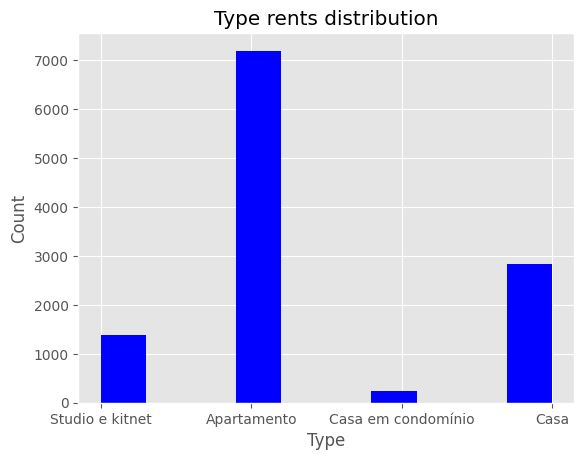

In [11]:
fig, ax = plt.subplots()

ax.hist(df['type'], color='blue')
ax.set_xlabel('Type')
ax.set_ylabel('Count')
ax.set_title('Type rents distribution')

plt.show()

In [12]:
# Type rent counting
df['type'].value_counts()

type
Apartamento           7194
Casa                  2841
Studio e kitnet       1381
Casa em condomínio     241
Name: count, dtype: int64

In [13]:
# Mean rent prices according with type
type_total = df.groupby('type')['total'].mean()
type_total

type
Apartamento           4435.428413
Casa                  3824.244280
Casa em condomínio    4576.232365
Studio e kitnet       2668.280232
Name: total, dtype: float64

- It's clear that private condominium has the most expensive rent, noting that this type of rent is for rich society
- Apartments is the predominent type of rent, as expected from a metropoly

# 4. Badrooms/Garage analysis

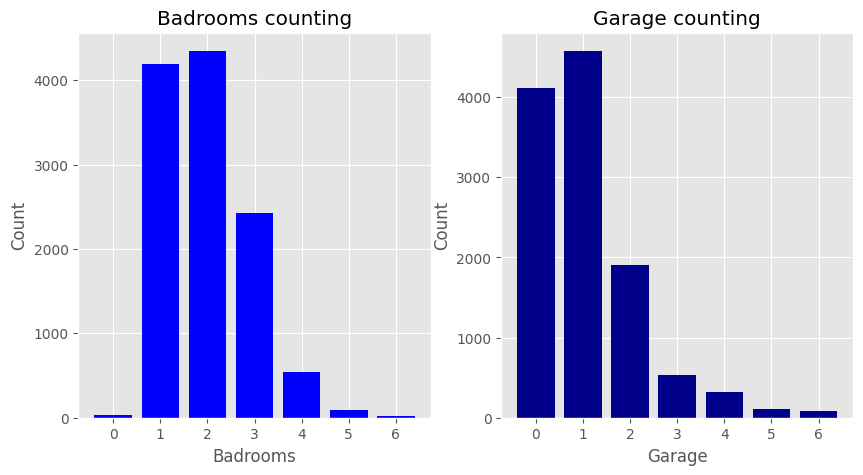

In [14]:
bedrooms = df['bedrooms'].value_counts()
garage = df['garage'].value_counts()

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].bar(bedrooms.index, bedrooms.values, color='blue')
ax[0].set_xlabel('Badrooms')
ax[0].set_ylabel('Count')
ax[0].set_title('Badrooms counting')

ax[1].bar(garage.index, garage.values, color='darkblue')
ax[1].set_xlabel('Garage')
ax[1].set_ylabel('Count')
ax[1].set_title('Garage counting')

plt.show();

- Garage can be a good indicator to increase the housing rent

# 5. Area Analysis

In [15]:
df['area'].describe()

count    11657.000000
mean        84.655658
std         74.020536
min          0.000000
25%         40.000000
50%         60.000000
75%         96.000000
max        580.000000
Name: area, dtype: float64

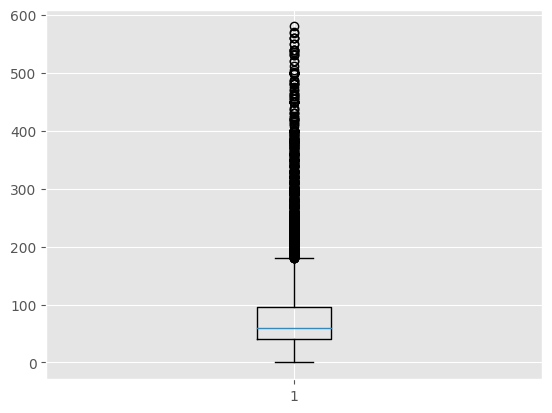

In [16]:
fig, ax = plt.subplots()
ax.boxplot(df['area'])
plt.show()

- Most part of the properties has area between 40m² and 96m²
- The huge presence of outliers shows that despite of the amplitude, a lot of properties are bigger than that.
- The distribution is right-skewed due the median line is next from the lower bound of the box (positive skewness)
- There is something wrong with dataframe, we can ascertain properties with area == 0m². Let's locate areas lower than 10m² and exclude from dataframe.

In [17]:
print(f'Thera are {df.query("area < 10").shape[0]} properties with area lower than 10m²')

Thera are 7 properties with area lower than 10m²


In [18]:
area_lower = df.query('area < 10')
display(area_lower)

,address,district,area,bedrooms,garage,type,rent,total
962,Rua Engenheiro Bianor,Butantã,1,1,1,Studio e kitnet,2490,2987
1223,Rua Mussumés,Vila Maria Alta,5,1,0,Casa,570,594
2983,Rua Relíquia,Jardim das Laranjeiras,0,2,1,Apartamento,1600,2569
5323,Rua Solidônio Leite,Vila Ivone,2,2,2,Casa,2500,2711
7085,Rua Edmundo de Amicis,Morumbi,0,3,2,Casa,3200,3351
9898,Rua Visconde de Porto Seguro,Jardim dos Estados,1,4,3,Casa em condomínio,8500,11420
11055,Travessa Santa Filomena,Vila Campo Grande,4,1,0,Casa,630,641


In [19]:
df = df.query('area >= 10')

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
area,11650.0,84.705408,74.014919,10.0,40.00,60.0,96.00,580.0
bedrooms,11650.0,1.966266,0.931223,0.0,1.00,2.0,3.00,6.0
garage,11650.0,1.060258,1.132394,0.0,0.00,1.0,2.00,6.0
rent,11650.0,3251.095107,2650.771522,500.0,1590.00,2415.0,3800.00,25000.0
total,11650.0,4080.398627,3352.415415,509.0,1996.25,3057.0,4774.75,28700.0


# 6. District analysis

Let's find the districts with most properties/expensive rent

In [21]:
print(f'We have {df["district"].nunique()} districts')

We have 1199 districts


In [22]:
top_dist = df.groupby('district').size().sort_values(ascending=False).reset_index(name='Count')[:10]
top_dist.columns = ['District', 'Count']
print('Top 10 District most properties')
display(top_dist)

Top 10 District most properties


,District,Count
0,Bela Vista,352
1,Vila Mariana,232
2,Jardim Paulista,220
3,Centro,178
4,Pinheiros,159
5,Consolação,157
6,Santana,152
7,Mooca,147
8,Santo Amaro,146
9,Brás,141


In [23]:
# Top 10 highest rent by district
top_rent = df.groupby('district')[['rent', 'area', 'bedrooms', 'garage']].mean().reset_index()
top_rent.sort_values('rent', ascending=False)[:10]

,district,rent,area,bedrooms,garage
475,Jardim Tango,15000.000000,15.000000,1.000000,1.0
8,Alphaville Residencial Dois,15000.000000,540.000000,6.000000,6.0
9,Alphaville Residencial Plus,15000.000000,420.000000,4.000000,4.0
689,Residencial Cinco (alphaville),13600.000000,385.000000,4.000000,6.0
10,Alphaville Residencial Um,13500.000000,445.000000,3.000000,4.0
533,Jardim dos Estados,13125.000000,365.000000,3.500000,4.0
101,Cidade Jardim,13000.000000,420.000000,4.000000,2.0
577,Pacaembu,12054.000000,439.200000,4.200000,3.6
82,Chácara Meyer,12000.000000,505.000000,5.000000,4.0
70,Centro Empresarial Tamboré,11833.333333,179.333333,3.333333,3.0


We've got two problems:
- Jardim Tango has the highest mean rent but a strange area size and bedrooms/garage quantity, probably something wrong with the data.
- Alphaville is known as a rich neighbordhood in São Paulo, we have a lot of equal sample.

Let's drop the Jardim Tango and leave only the highest Alphaville sample to diversify our analysis.

In [24]:
drop_dist = ['Jardim Tango', 'Alphaville Residencial Plus', 'Residencial Cinco (alphaville)', 'Alphaville Residencial Um']
top_rent = top_rent.loc[~top_rent['district'].isin(drop_dist)]
top_rent = top_rent.sort_values('rent', ascending=False)[:10]
display(top_rent)

,district,rent,area,bedrooms,garage
8,Alphaville Residencial Dois,15000.000000,540.000000,6.000000,6.000
533,Jardim dos Estados,13125.000000,365.000000,3.500000,4.000
101,Cidade Jardim,13000.000000,420.000000,4.000000,2.000
577,Pacaembu,12054.000000,439.200000,4.200000,3.600
82,Chácara Meyer,12000.000000,505.000000,5.000000,4.000
70,Centro Empresarial Tamboré,11833.333333,179.333333,3.333333,3.000
505,Jardim Vitoria Regia (zona Oeste),11820.000000,350.000000,4.000000,4.000
248,Jardim Cordeiro,11250.000000,400.000000,3.000000,4.000
3,Alphaville,11247.458333,343.791667,3.375000,3.625
85,Chácara Santo Antônio,10650.000000,238.750000,3.500000,3.000


In [25]:
fig = px.bar(top_rent, 
             x='rent', 
             y='district', 
             orientation='h', 
             color='rent', 
             title='Top Mean Rent by District',
            labels={'rent': 'Mean Rent (R$)', 'district': 'District'})
fig.update_yaxes(autorange='reversed')
fig.show()

In [26]:
# lower rent by district
bottom_rent = df.groupby('district')[['rent', 'area', 'bedrooms', 'garage']].mean().reset_index()
bottom_rent = bottom_rent.sort_values('rent', ascending=True)[:10]
display(bottom_rent)

,district,rent,area,bedrooms,garage
306,Jardim Jaçanã,500.0,30.0,1.0,0.0
293,Jardim Inga,600.0,55.0,1.0,0.0
274,Jardim Frei Galvão,629.0,24.0,1.0,0.0
331,Jardim Maraba,630.0,20.0,1.0,0.0
959,Vila Lais,660.0,20.0,1.0,0.0
836,Vila Cardoso Franco,700.5,45.0,1.5,0.5
1083,Vila Ramos,710.0,37.5,1.0,0.0
1151,Vila São Luís,740.0,15.0,1.0,0.0
735,Sítio do Piqueri,750.0,35.0,1.0,0.0
495,Jardim Vergueiro,759.0,40.0,1.0,0.0


In [27]:
fig = px.bar(bottom_rent,
            x='rent',
            y='district',
            orientation='h',
            color='rent',
            labels={'rent': 'Mean rent (R$)', 'district': 'District'},
            title='Lower Rent by District')

fig.update_yaxes(autorange='reversed')
fig.show()

In [28]:
# Comparing the rent stats
print('Bottom rent stats')
display(bottom_rent.describe().T),
print('Top rent stats')
display(top_rent.describe().T)

Bottom rent stats


,count,mean,std,min,25%,50%,75%,max
rent,10.0,667.85,80.888143,500.0,629.25,680.25,732.500,759.0
area,10.0,32.15,12.675545,15.0,21.00,32.50,39.375,55.0
bedrooms,10.0,1.05,0.158114,1.0,1.00,1.00,1.000,1.5
garage,10.0,0.05,0.158114,0.0,0.00,0.00,0.000,0.5


Top rent stats


,count,mean,std,min,25%,50%,75%,max
rent,10.0,12197.979167,1242.223823,10650.000000,11392.50000,11916.666667,12763.50,15000.0
area,10.0,378.107500,110.226303,179.333333,345.34375,382.500000,434.40,540.0
bedrooms,10.0,3.990833,0.905184,3.000000,3.40625,3.750000,4.15,6.0
garage,10.0,3.722500,1.029054,2.000000,3.15000,3.812500,4.00,6.0


# 7. Comparing the variables

This section will be dedicated to analyze the correlation according to the features between the higher/lower rents

Let's increase the total sample to 50

In [29]:
expensive_rents = df.groupby('district')['rent'].mean().reset_index()
expensive_rents = expensive_rents.sort_values('rent', ascending=False)[:50]
cheap_rents = df.groupby('district')['rent'].mean().reset_index()
cheap_rents = cheap_rents.sort_values('rent', ascending=True)[:50]

top_rent_sample = df[df['district'].isin(expensive_rents['district'])]
top_rent_sample = top_rent_sample.sort_values('rent', ascending=False)

bottom_rent_sample = df[df['district'].isin(cheap_rents['district'])]
bottom_rent_sample = bottom_rent_sample.sort_values('rent', ascending=True)

display(top_rent_sample.head()), display(bottom_rent_sample.head())

,address,district,area,bedrooms,garage,type,rent,total
9913,Rua Canumá,Jardim dos Estados,365,3,4,Casa,15000,17120
11565,Alameda Equador,Alphaville Residencial Dois,540,6,6,Casa em condomínio,15000,17410
9892,Rua Marcondésia,Chácara Monte Alegre,269,3,4,Casa,15000,16120
11572,Alameda Barretos,Alphaville,397,3,2,Casa em condomínio,15000,16940
9902,Rua Estuário,Chácara Monte Alegre,532,6,4,Casa,15000,18050


,address,district,area,bedrooms,garage,type,rent,total
4741,Rua Manoel Oliveira Gonçalves,Jardim Jaçanã,30,1,0,Casa,500,509
6020,Rua Martinho Gonçalves,Parque Casa de Pedra,25,1,0,Casa,552,576
3733,Rua Antônio D'agostinho,Jardim Dourado,18,1,0,Apartamento,567,722
6193,Rua Alexandre Bening,Jardim Inga,55,1,0,Casa,600,671
4265,Rua Maria José de Jesus,Vila Cardoso Franco,40,1,0,Casa,610,636


(None, None)

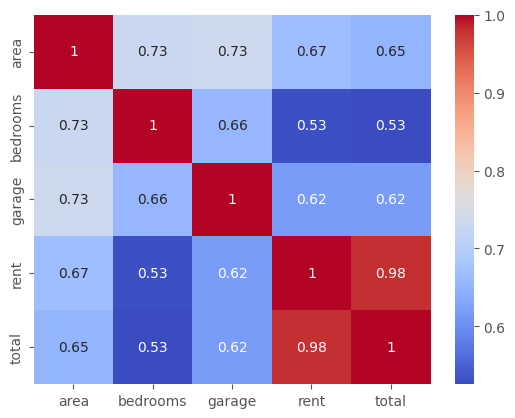

In [39]:
df_corr = df.corr(numeric_only=True)
sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.show()

In [30]:
# Rent distribution
top_rent_sample['class'] = 'Upper'
bottom_rent_sample['class'] = 'Lower'

fig = go.Figure()

fig.add_trace(go.Box(x=top_rent_sample['class'], y=top_rent_sample['rent'], name='Upper', boxpoints='outliers', marker_color='blue'))

fig.add_trace(go.Box(x=bottom_rent_sample['class'],
                    y=bottom_rent_sample['rent'],
                    name='Lower',
                    boxpoints='outliers',
                    marker_color='red'))

fig.update_layout(xaxis=dict(title='Class'),
                 yaxis=dict(title='Rent'),
                 title='Comparision by Rent',
                 showlegend=True)

fig.show()

In [31]:
# Comparing by type

top_type_sample = top_rent_sample.groupby('type')['rent'].mean().reset_index()
bottom_type_sample = bottom_rent_sample.groupby('type')['rent'].mean().reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(x=top_type_sample['type'],
                    y=top_type_sample['rent'],
                    name='Top rent'))

fig.add_trace(go.Bar(x=bottom_type_sample['type'],
                    y=bottom_type_sample['rent'],
                    name='Bottom rent'))

fig.update_layout(title='Comparision by Type')

fig.show()

In [32]:
# Comparing by area

top_area_sample = top_rent_sample.groupby('type')['area'].mean().reset_index()
bottom_area_sample = bottom_rent_sample.groupby('type')['area'].mean().reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(x=top_area_sample['type'],
                    y=top_area_sample['area'],
                    name='Top Rent'))

fig.add_trace(go.Bar(x=bottom_area_sample['type'],
                    y=bottom_area_sample['area'],
                    name='Bottom Rent'))

fig.update_layout(title='Comparision Mean Area by Type',
                 xaxis_title='Type',
                 yaxis_title='Area')

fig.show()

In [33]:
# Comparing by bedrooms
top_bed_sample = top_rent_sample['bedrooms'].value_counts().reset_index()
top_bed_sample = top_bed_sample.sort_values('bedrooms', ascending=True)

bottom_bed_sample = bottom_rent_sample['bedrooms'].value_counts().reset_index()
bottom_bed_sample = bottom_bed_sample.sort_values('bedrooms', ascending=True)

fig = go.Figure()

fig.add_trace(go.Bar(x=top_bed_sample['bedrooms'],
                    y=top_bed_sample['count'],
                    name='Top Rent'))

fig.add_trace(go.Bar(x=bottom_bed_sample['bedrooms'],
                    y=bottom_bed_sample['count'],
                    name='Bottom Rent'))

fig.update_layout(title='Comparision by Bedrooms',
                 xaxis_title='Bedrooms',
                 yaxis_title='Count')

fig.show()

In [34]:
top_garage_sample = top_rent_sample['garage'].value_counts().reset_index()
top_garage_sample = top_garage_sample.sort_values('garage', ascending=True)

bottom_garage_sample = bottom_rent_sample['garage'].value_counts().reset_index()
bottom_garage_sample = bottom_garage_sample.sort_values('garage', ascending=True)

fig = go.Figure()

fig.add_trace(go.Bar(x=top_garage_sample['garage'],
                    y=top_garage_sample['count'],
                    name='Top rent'))

fig.add_trace(go.Bar(x=bottom_garage_sample['garage'],
                    y=bottom_garage_sample['count'],
                    name='Bottom rent'))

fig.update_layout(title='Comparision by Garage',
                 xaxis_title='Garage',
                 yaxis_title='Count')

fig.show()

# 8. Conclusion
Area size is the strongest predictor for rent prince, followed by numbers of garages and bethrooms, respectively. São Paulo has one of the most expensive area coast by m² in Brazil. It's clear the distance between expensive rents from lower when comparing the type of propertie, proving that house has a increase difference compared by apartment and studio.
Lowers rents has, on average, one or two bedrooms and in the most part zero garage, maybe one. On the other hand, expensive rents predominates properties with 3 bedrooms e 2 garages, but there are a expressive part that has more than that.
The heatmap shows that all the features has a moderate/strong correlation, and it's kind obvious because the bigger one of them, the rent gets expensive. 